In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./processing-data/train_with_tokens.csv')

In [17]:
def load_labels(path: str) -> list:
    """
    Load labels from txt file and return as a list
    """
    with open(path, 'r') as file:
        labels = file.readlines()
    labels = [label.strip().split()[1] for label in labels]
    return labels

In [18]:
labels = load_labels('../artifacts/emotions.txt')
labels

['NEUTRAL', 'HAPPY', 'SAD', 'ANGRY', 'SUPRISED', 'SCARED', 'CURIOUS', 'BORING']

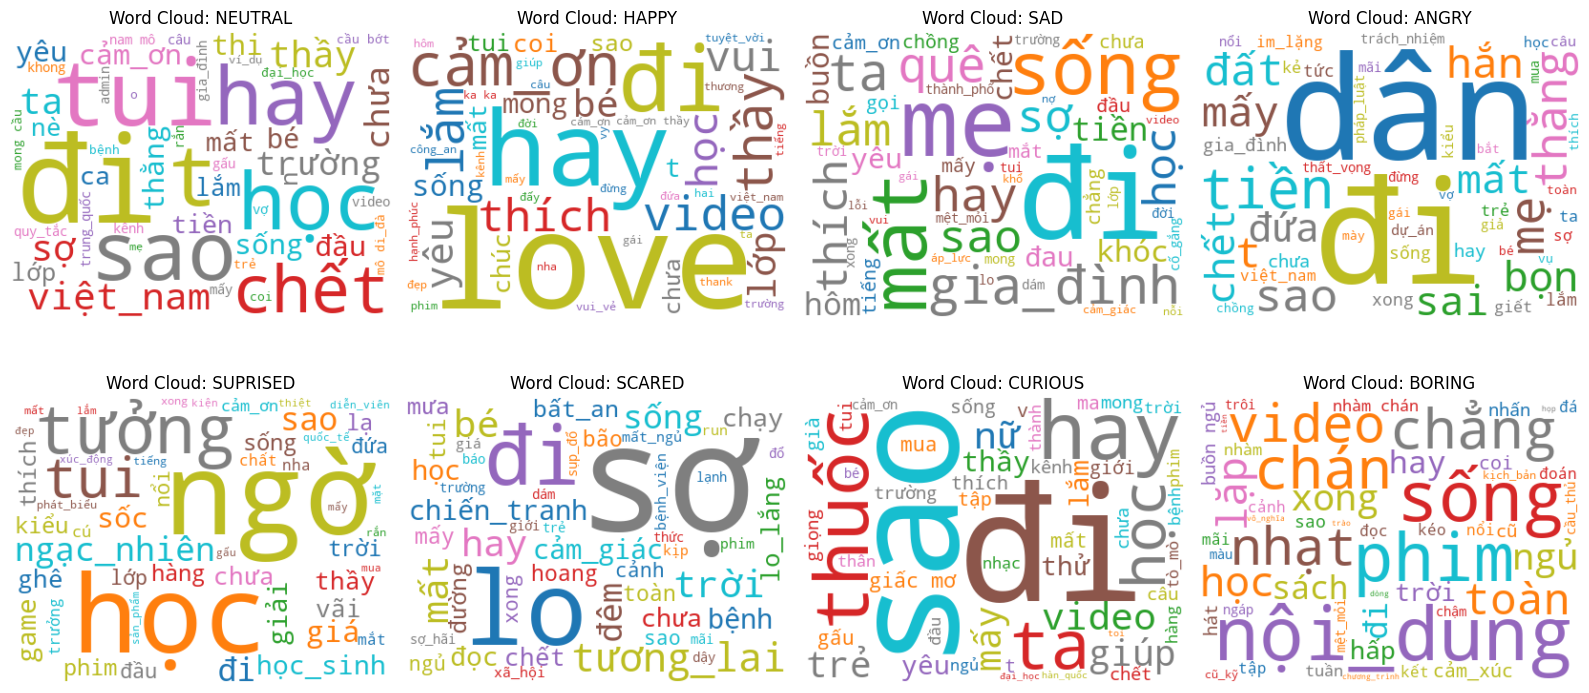

In [19]:
from wordcloud import WordCloud

fig_wc, axes_wc = plt.subplots(2, 4, figsize=(16, 8))
axes_wc = axes_wc.flatten()

for idx, label_name in enumerate(labels):
    ax = axes_wc[idx]
    text = " ".join(df[df['label'] == idx]['tokens'].astype(str))
    wc = WordCloud(width=400, height=300, background_color='white', colormap='tab10', max_words=50).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Word Cloud: {label_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()